In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%cd /content/drive/MyDrive/Signal and Image Processing With Python/Section20_Frequency Domain Filtering

/content/drive/MyDrive/Signal and Image Processing With Python/Section20_Frequency Domain Filtering


In [19]:
img1 = cv2.imread('lena.tif', 0)

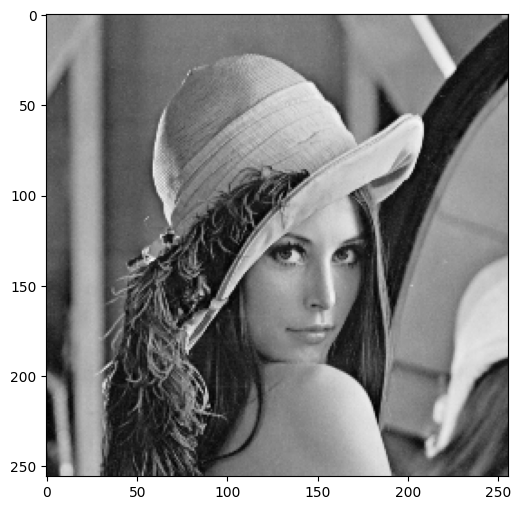

In [20]:
plt.figure(figsize=(12,6))
plt.imshow(img1, cmap = 'gray')
plt.show()

# Discrete Fourier Transform ( DFT )

In [21]:
dft = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)

In [22]:
dft.shape

(256, 256, 2)

In [23]:
# Rearranges a Fourier transform by shifting the zero-frequency component to the center of the array. Otherwise,
#it starts at the top left corner of the image (array).

dft_shift1 = np.fft.fftshift(dft)

In [24]:
#The magnitude of the function is 20. log(abs(f)), For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. dft_shift[:, :,0] will be a real part dft[:, :, 1] will be an imaginary
#part.

magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0], dft_shift1[:,:,1]) )

In [25]:
magnitude_spectrum1.shape

(256, 256)

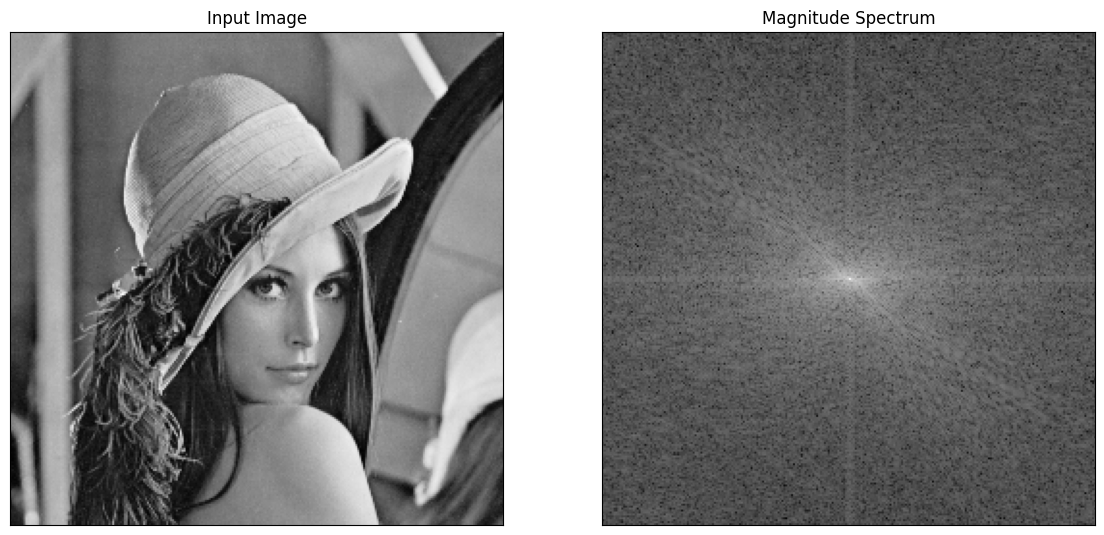

In [26]:
# visualize input image and the magnitude spectrum
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

# Another Example

In [27]:
img2 = cv2.imread('Vegetable.jpg', 0)

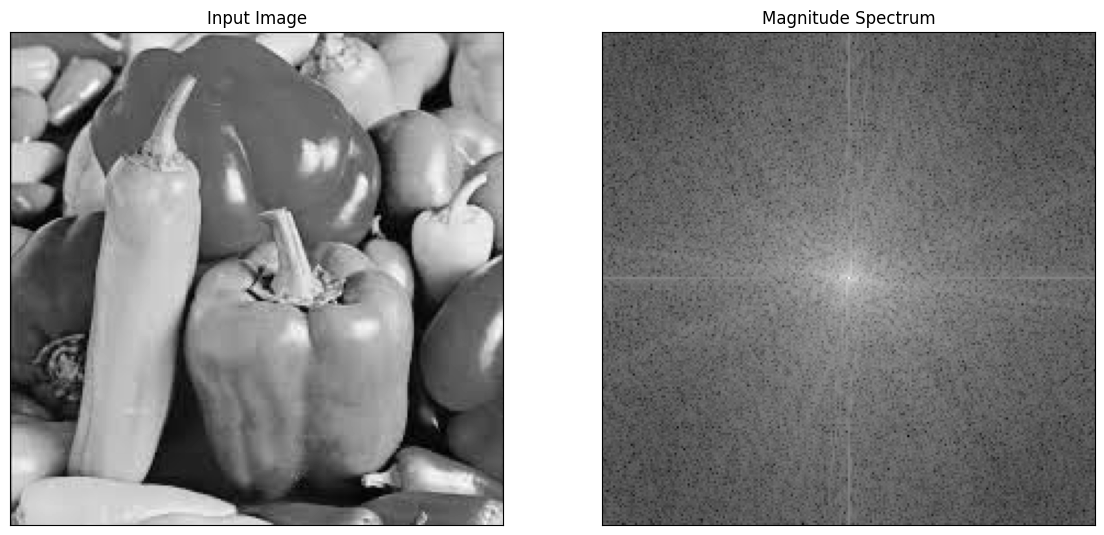

In [28]:
dft = cv2.dft(np.float32(img2),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft)
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0], dft_shift2[:,:,1]))
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img2, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

# Low Pass Filtering

In [29]:
# In this magnitude spectrum, we need to apply or block off all the central regions or central pixels. 
# Circular LPF(Low Pass Filter) mask, the center circle is 1, remaining pixels are zeros. 

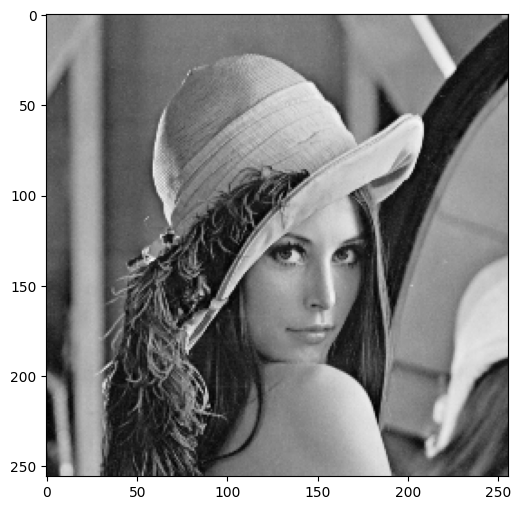

In [30]:
plt.figure(figsize=(12,6))
plt.imshow(img1, cmap = 'gray')
plt.show()

In [31]:
img1.shape

(256, 256)

# Creating a Low Pass Filter

In [32]:
rows, cols = img1.shape
crow, ccol = rows//2 , cols//2     # center

# create a filter first, center square is 1, remaining all zeros
filter = np.zeros((rows, cols, 2), np.float32)

#Note that the the filter.shape is (rows, cols, 2) which matches the returned np.ndarray from cv2.dft().
D_0 = 60
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
filter_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= D_0 * D_0
filter[filter_area] = 1

In [33]:
filter.shape

(256, 256, 2)

In [34]:
filter.dtype

dtype('float32')

In [35]:
filter_to_plot = cv2.magnitude(filter[:,:,0] ,filter[:,:,1])

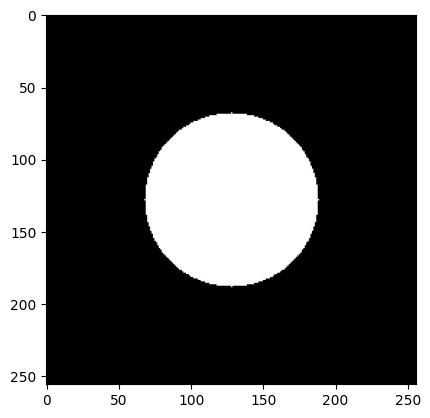

In [36]:
plt.imshow(filter_to_plot, cmap = 'gray')
plt.show()

# Performing Low pass Filtering

In [37]:
# apply filter and inverse DFT
fshift = dft_shift1 * filter
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

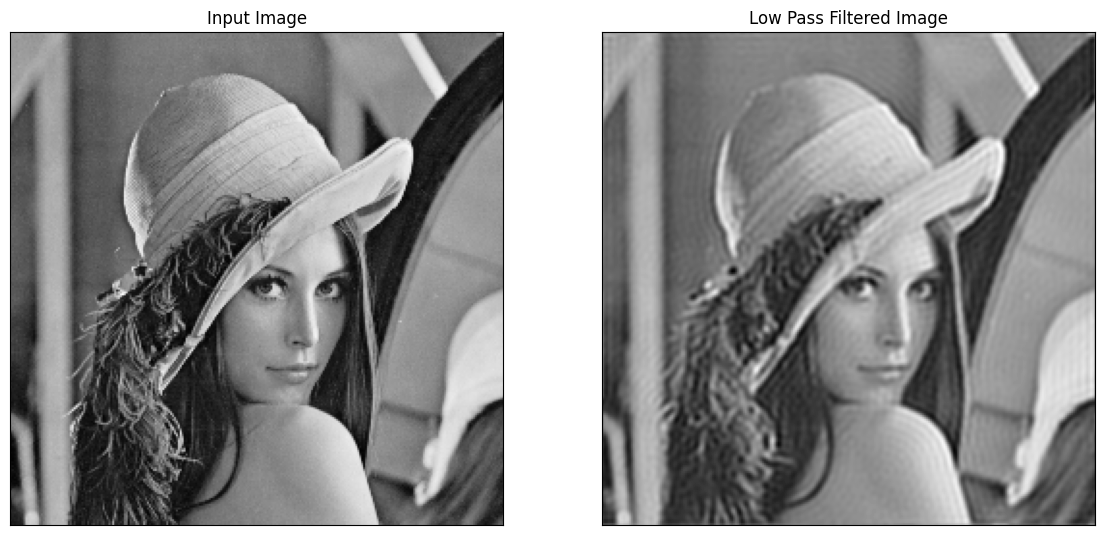

In [38]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()      

# High Pass Filtering

In [39]:
rows, cols = img1.shape
crow, ccol = rows//2 , cols//2     # center


HPF = np.ones((rows, cols, 2), np.float32)


D_0 = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
HPF_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= D_0 * D_0
HPF[HPF_area] = 0

In [40]:
HPF_to_plot = cv2.magnitude(HPF[:,:,0], HPF[:,:,1])

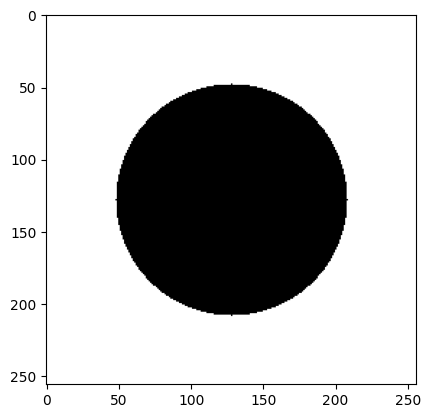

In [41]:
plt.imshow(HPF_to_plot, cmap = 'gray')
plt.show()

In [42]:
fshift = dft_shift1 * HPF
f_ishift = np.fft.ifftshift(fshift)
img_back_HPF = cv2.idft(f_ishift)
img_back_HPF = cv2.magnitude(img_back_HPF[:,:,0],img_back_HPF[:,:,1])

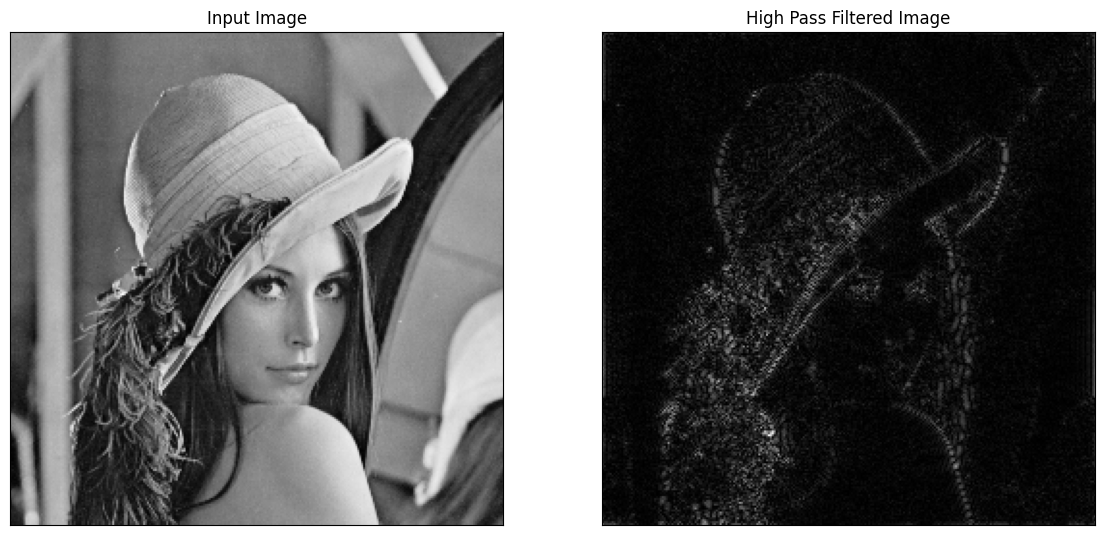

In [43]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back_HPF, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()      

# High boost Filter is a High Pass Filter

In [44]:
HighBoostFilter = np.array([[-1, -1, -1], 
                            [-1, 8, -1], 
                            [-1, -1, -1]])

In [45]:
HighBoostFilter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [46]:
dft_boost = cv2.dft(np.float32(HighBoostFilter),flags = cv2.DFT_COMPLEX_OUTPUT)

In [47]:
dft_shift_boost = np.fft.fftshift(dft_boost)

In [48]:
magnitude_spectrum_boost = cv2.magnitude(dft_shift_boost[:,:,0], dft_shift_boost[:,:,1]) 

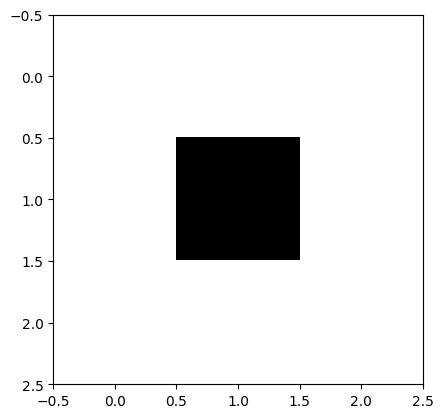

In [49]:
plt.imshow(magnitude_spectrum_boost, cmap = 'gray')
plt.show()

# Understanding np.ogrid

In [50]:
x, y = np.ogrid[:5, 12:17]
print(x)
print(" ")
print(y)
print(" ")
print(x.shape)
print(" ")
print(y.shape)


[[0]
 [1]
 [2]
 [3]
 [4]]
 
[[12 13 14 15 16]]
 
(5, 1)
 
(1, 5)
